In [1]:
import sys
sys.path.append("../")

In [2]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.pogw.pogw_2 import partial_order_gromov_wasserstein
from src.gdtw.GDTW import gromov_dtw
from src.experiments.digit_moving.utils import add_outlier, random_swap, get_ground_truth,get_ground_truth_matrix, soft_assigment_to_matching

In [3]:
import torch
def gromov_dtw_alignment(x1, x2):
    GDTW = gromov_dtw(
            max_iter=50, gamma=0.1, loss_only=0, dtw_approach="GDTW", verbose=0
        )
    x1 = torch.from_numpy(x1)
    x2 = torch.from_numpy(x2)
    result = GDTW.forward(x1, x2)
    return result[1]

In [4]:
mnist_data = np.load(f"../Datasets/test_long_moving/2_mmnist.npy").astype(np.float64)
usps_data = np.load(f"../Datasets/test_long_moving/2_usps.npy").astype(np.float64)
mnist_order = [i for i in range(mnist_data.shape[0])]
usps_order = [i for i in range(usps_data.shape[0])]
print(mnist_data.shape, usps_data.shape)
print(mnist_data.max(), mnist_data.min())
print(usps_data.max(), usps_data.min())


mnist_data, mnist_order = random_swap(mnist_data, mnist_order)
mnist_data, mnist_order = add_outlier(mnist_data, mnist_order, n_outliers=1, norm=False)
usps_data, usps_order = add_outlier(usps_data, usps_order, n_outliers=1, norm=False)


flatten_usps_data = np.array([i.flatten() for i in usps_data])
flatten_mnist_data = np.array([i.flatten() for i in mnist_data])

(10, 46, 46) (10, 34, 34)
255.0 0.0
247.0 0.0


In [5]:
mnist_order

[0, 1, 2, 3, -1, 4, 6, 5, 7, 8, 9]

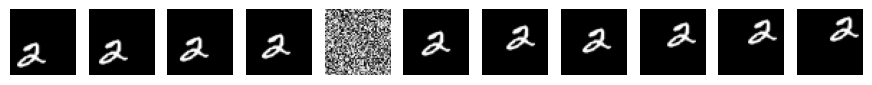

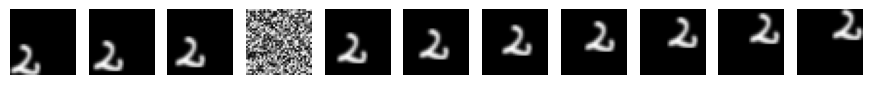

In [6]:
from PIL import Image
import cv2

len_seq = mnist_data.shape[0]
plt.figure(figsize=(len_seq,len_seq))
for i in range(len_seq):
    plt.subplot(1,len_seq,i+1)
    plt.imshow(mnist_data[i], cmap="gray")
    plt.axis("off")
    # save img
    # img = Image.fromarray(mnist_data[i])
    cv2.imwrite(f"../_visualization/2_mnist/{i}.png", mnist_data[i])

plt.figure(figsize=(len_seq,len_seq))
for i in range(len_seq):
    plt.subplot(1,len_seq,i+1)
    plt.imshow(usps_data[i], cmap="gray")
    plt.axis("off")
    cv2.imwrite(f"../_visualization/2_usps/{i}.png", usps_data[i])

PGW

<Axes: >

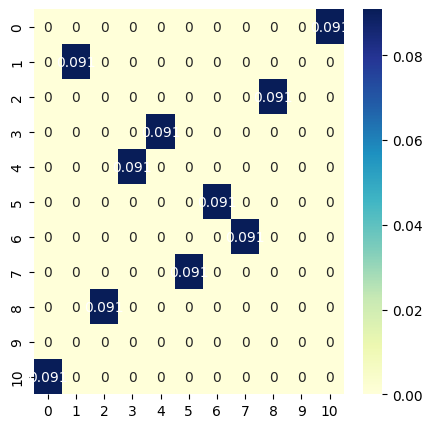

In [7]:
C1 = ot.dist(flatten_mnist_data,metric="euclidean").astype(np.float64)
C2 = ot.dist(flatten_usps_data,metric="euclidean").astype(np.float64)

C1 = C1/C1.max()
C2 = C2/C2.max()

p1 = ot.unif(C1.shape[0])
p2 = ot.unif(C2.shape[0])

T = partial_order_gromov_wasserstein(C1,C2,p1,p2,m = 10/11, order_reg=0, return_dist=False)
plt.figure(figsize=(len_seq//2,len_seq//2))
sns.heatmap(T.round(4),cmap="YlGnBu",annot = True)

POGW

<Axes: >

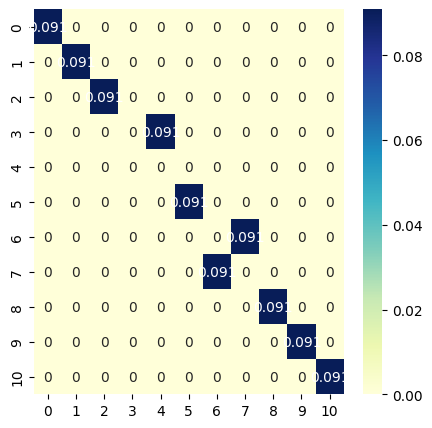

In [8]:
C1 = ot.dist(flatten_mnist_data,metric="euclidean").astype(np.float64)
C2 = ot.dist(flatten_usps_data,metric="euclidean").astype(np.float64)

# C1 = C1 / C1.mean()
# C2 = C2 / C2.mean()

# C1 = C1 / C1.max()
# C2 = C2 / C2.max()

p1 = ot.unif(C1.shape[0])
p2 = ot.unif(C2.shape[0])

T = partial_order_gromov_wasserstein(C1,C2,p1,p2,m = 10/11, order_reg=100, return_dist=False)
plt.figure(figsize=(len_seq//2,len_seq//2))
sns.heatmap(T.round(4),cmap="YlGnBu",annot = True)

OGW

<Axes: >

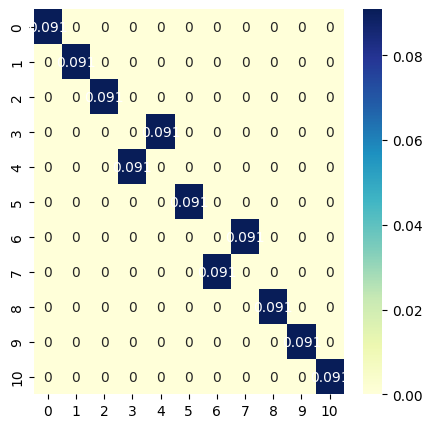

In [9]:
C1 = ot.dist(flatten_mnist_data,metric="euclidean").astype(np.float64)
C2 = ot.dist(flatten_usps_data,metric="euclidean").astype(np.float64)

# C1 = C1 / C1.mean()
# C2 = C2 / C2.mean()

# C1 = C1 / C1.max()
# C2 = C2 / C2.max()

p1 = ot.unif(C1.shape[0])
p2 = ot.unif(C2.shape[0])

T = partial_order_gromov_wasserstein(C1,C2,p1,p2,m = None, order_reg=100, return_dist=False)
plt.figure(figsize=(len_seq//2,len_seq//2))
sns.heatmap(T.round(4),cmap="YlGnBu",annot = True)

GDTW

In [10]:
alignment = gromov_dtw_alignment(flatten_mnist_data, flatten_usps_data)

In [11]:
T = alignment.numpy()

<Axes: >

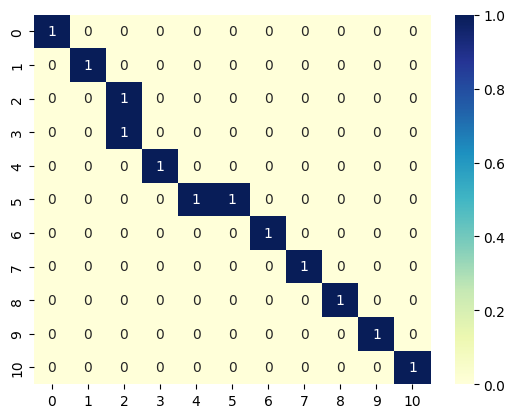

In [12]:
sns.heatmap(T.round(4),cmap="YlGnBu",annot = True)

In [90]:
M = np.zeros((10,10))

I = np.zeros_like(M)
rows, cols = M.shape
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        I[i, j] = np.abs((i+1) / rows - (j+1) / cols)**2

<Axes: >

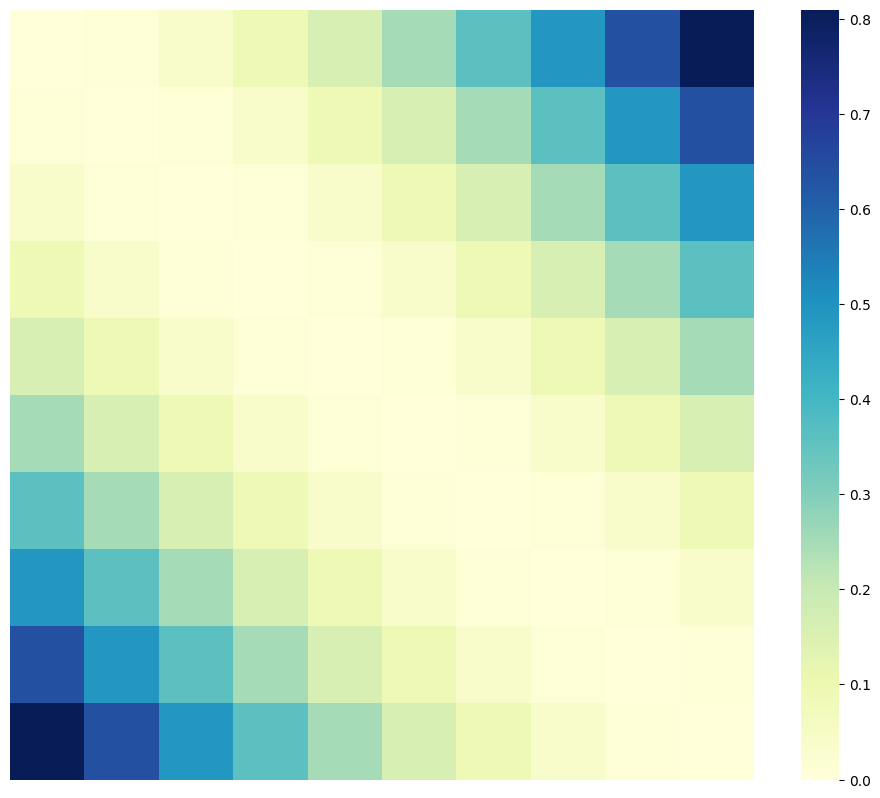

In [91]:
plt.figure(figsize=(12,10))
plt.axis("off")
sns.heatmap(I,cmap="YlGnBu")

In [92]:
M = np.zeros((10,5))

I = np.zeros_like(M)
rows, cols = M.shape
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        I[i, j] = np.abs((i+1) / rows - (j+1) / cols)**2

<Axes: >

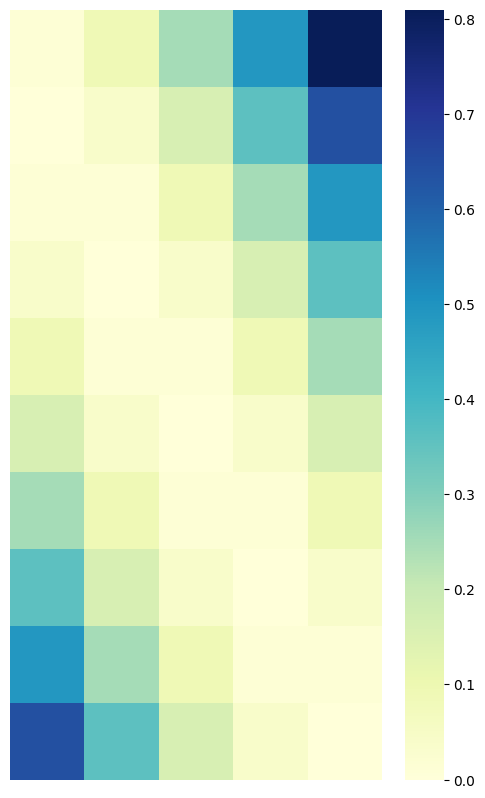

In [95]:
plt.figure(figsize=(6,10))
plt.axis("off")
sns.heatmap(I,cmap="YlGnBu",annot=False)